<a href="https://colab.research.google.com/github/Ritika-Gada/verbose-memory/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data into a pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data.head()  #printing the first 5 lines

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_data.tail() #printing the last 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#number of rows and columns in the dataset
gold_data.shape

(2290, 6)

In [6]:
#statistical measures
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
#getting basic information about the datatypes of the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking the number of missing values
gold_data.isnull().mean()

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

Correlation:
1. Positive correlation - directly related
2. Negative correlation - inversely related

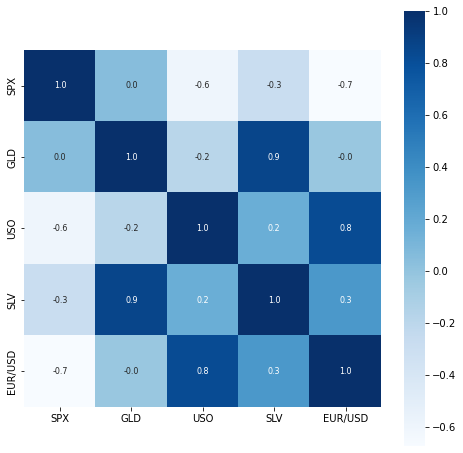

In [17]:
correlation = gold_data.corr()

#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size': 8}, cmap='Blues')

In [18]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


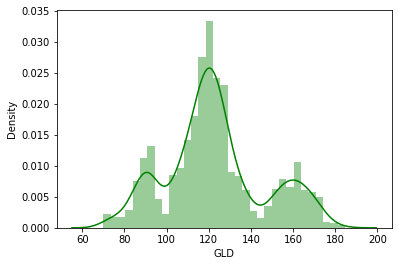

In [19]:
#checking the distribution of the gold price
sns.distplot(gold_data['GLD'], color = 'green')

Splitting the Features and Target

In [20]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [21]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting Data into Training and Testing data

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


Model Training Random Forest Regressor

In [23]:
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [25]:
#prediction on test data
test_data_pred = regressor.predict(x_test)

In [26]:
print(test_data_pred)

[168.68819948  82.36109968 116.07709986 127.55820064 120.70200141
 154.58649745 150.17229865 126.07320065 117.53089881 126.04440084
 116.62330108 171.80180096 141.53979878 168.134499   115.13620008
 117.68770047 139.60170276 170.29610131 159.89410316 160.26609964
 155.18800013 125.25280034 175.94719981 157.19720355 125.15170048
  94.00859971  77.7368002  120.37110017 118.92479904 167.61770004
  88.20950016 125.19299978  91.19570089 117.5923002  121.18759918
 136.63970064 115.55660106 115.42170078 146.92920015 107.41800113
 104.1794024   87.08719791 126.57540045 117.99880011 152.89789874
 119.67700013 108.53049919 107.96989835  93.23290057 127.24129747
  74.91880054 113.6297995  121.13000012 111.27629929 118.90369878
 120.5554994  159.7602999  166.98370116 146.82879649  86.00509874
  94.36200042  86.8783987   90.6142001  118.82570097 126.50270069
 127.65059977 171.45919979 122.23879967 117.43599894  98.44980033
 168.30470158 142.98589818 132.16850264 121.2235021  121.33979929
 119.47410

In [27]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_pred)
print('R squared error : ',error_score)

R squared error :  0.9894819633067164


Compare the Actual Value and Predicted Value in a Plot

In [28]:
y_test = list(y_test)

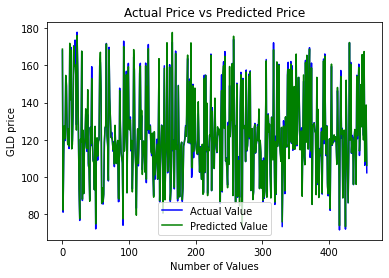

In [30]:
plt.plot(y_test,color='blue', label = 'Actual Value')
plt.plot(test_data_pred, color='green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD price')
plt.legend()
plt.show()